## Classification Task dengan Naive Bayes

### Bayes' Theorem

Bayes' theorem menawarkan suatu formula untuk menghitung nilai probability dari suatu event dengan memanfaatkan pengetahuan sebelumnya dari kondisi terkait; atau sering kali dikenal dengan istilah conditional probability.

### Pengenalan Naive Bayes Classification

#### *Studi Kasus 1*

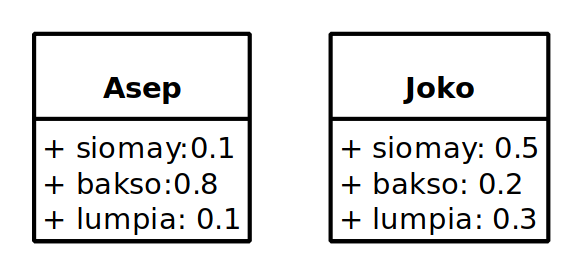

#### Misi :
Lakukan prediksi siapa pelanggan yang melakukan pemesanan dengan diketahui pesanannya adalah lumpia dan bakso.

#### Prior Probability: $P(y)$

Referensi: https://en.wikipedia.org/wiki/Prior_probability

- $P(Asep) = 0.5$

- $P(Joko) = 0.5$

#### Likelihood: $P(X|y)$

Referensi: https://en.wikipedia.org/wiki/Likelihood_function

Asep:$$ 
\begin{aligned} P(lumpia,bakso|Asep) &amp;= (0.1 \times 0.8)\\
&amp;= 0.08
\end{aligned} 
$$

Joko:$$ \begin{aligned} P(lumpia,bakso|Joko) &amp;= (0.3 \times 0.2)\\
&amp;= 0.06
\end{aligned} 
$$

#### Evidence atau Normalizer: $P(X)$
$$
\begin{aligned}
 Evidence &amp;amp;= \sum (Likelihood \times Prior) \\
 P(lumpia,bakso) &amp;amp;= (0.08 \times 0.5)+ (0.06 \times 0.5) \\
                 &amp;amp;= 0.07
\end{aligned}
$$

#### Posterior Probability: $P(y|X)$

Referensi: https://en.wikipedia.org/wiki/Posterior_probability

Formula:

$Posterior = \frac{ Likelihood \times Prior}{ Evidence }$

Asep:$$
\begin{aligned}
P(Asep|lumpia,bakso) &amp;amp;= \frac{0.08 \times 0.5}{0.07} \\
&amp;amp;= 0.57 
\end{aligned}
$$

Joko:$$
\begin{aligned}
P(Joko|lumpia,bakso) &amp;amp;= \frac{0.06 \times 0.5}{0.07} \\
&amp;amp;= 0.43 
\end{aligned}
$$

#### *Studi Kasus ke 2*

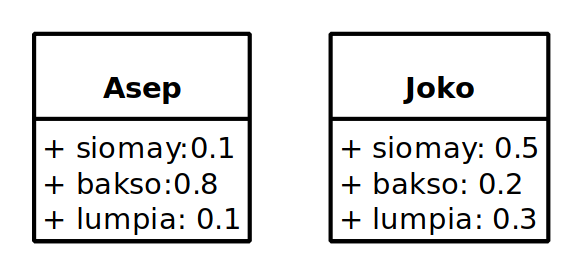

#### Misi:
Lakukan prediksi siapa pelanggan yang melakukan pemesanan dengan diketahui pesanannya adalah siomay dan bakso.

#### Posterior Probability: $P(y|X)$

pesanan: siomay, bakso
Evidence: $P(X)$$$$$\begin{aligned}
P(siomay,bakso) &amp;amp;= (0.1 \times 0.8 \times 0.5) + (0.5 \times 0.2 \times 0.5) \\
&amp;amp;= 0.09
\end{aligned}$$$$

Asep:$$ \begin{aligned} P(Asep|siomay,bakso) &amp;= \frac{(0.1 \times 0.8) \times 0.5}{0.09} \\
&amp;= 0.444
\end{aligned} 
$$

Joko:$$ \begin{aligned} P(Joko|siomay,bakso) &amp;= \frac{(0.5 \times 0.2) \times 0.5}{0.09} \\
&amp;= 0.555
\end{aligned} 
$$

### Mengapa disebut Naive?

Karena sewaktu kita mendefinisikan Likelihood $P(lumpia,bakso|Asep)$,
kita mengasumsikan $P(lumpia|Asep)$ conditionally independent terhadap $P(bakso|Asep)$; demikian sebaliknya.
Sehingga dapat diformulasikan sebagai berikut: $P(lumpia,bakso|Asep) = P(lumpia|Asep) \times P(bakso|Asep)$

### Dataset: Breast Cancer Wisconsin (Diagnostic)

Referensi: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

#### Load Dataset

In [1]:
from sklearn.datasets import load_breast_cancer

print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
# load_breast_cancer?

X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

- Variabel X untuk menampung nilai features dan variabel y untuk menampung nilai label.

- Terdapat 569 jumlah baris dan 30 jumlah kolom (features).

#### Training & Testing Set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')

X_train shape (455, 30)
X_test shape (114, 30)


- X_train memiliki jumlah data 455(80%) 

- X_test memiliki jumlah data 114(20%)

#### Naive Bayes dengan Scikit Learn

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9298245614035088

Nilai accuracynya yaitu 0.9298245614035088, dan nilai ini dapat diperoleh dengan cara sederhana sebagai berikut.

In [5]:
model.score(X_test, y_test)

0.9298245614035088

### SUMBER :  https://www.youtube.com/watch?v=Sj1ybuDDf9I